### **1. Problem Statement**
Di dalam Proyek ini, Tim Insight Engineer akan menganalisis dataset IKEA Furniture sehingga dapat merekomendasikan harga produk yang tepat yang dapat dijual oleh Manajemen IKEA kepada masyarakat.

IKEA adalah perusahaan yang bergerak di bidang furniture atau perabot rumah tangga dengan kantor pusat di Swedia. IKEA menjual beragam pilihan produk berkualitas dengan harga yang murah. Konsep penjualan IKEA juga mengusung pengantaran ke rumah atau membeli komponen agar dapat dirakit di rumah. Bahan produk IKEA juga terbuat dari kayu yang ramah lingkungan. Toko IKEA di Indonesia mengusung konsep wholesales seperti gudang sehingga dapat berfungsi menyimpan produk dalam kapasitas besar

Prediksi harga produk yang tepat dapat meminimalkan penetapan harga yang terlalu rendah dan tinggi setelah dihitung dengan diskon, karakteristik produk serta volume produknya sehingga dapat memaksimalkan potensi penjualan produk melalui strategi pengaturan harga. 

**a. Import Library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re 

from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

**b. Load Dataset**

In [ ]:
df = pd.read_csv('IKEA_SA_Furniture_Web_Scrapings_sss.csv', index_col = 0)

### **2. Data Understanding (Original data)**
| column name | description | 
| -- | -- |
| Unnamed: 0 | - |
| item_id | Product id |
| name | Name of product
| category | Category of product (furniture category) 
| price | Price of product after discount (current price)
| old_price | Price of product before discount
| sellable_online | Whether the product is sold online or not (bool)
| link | Web link
| other_colors | Any other choice of color? (bool)
| short_description | Brief description of product
| designer | Name who design the product
| depth | Depth of product (cm)
| height | Height of product (cm)
| width | Width of product (cm)

data set bersumber dari kaggle (Source: https://www.kaggle.com/ahmedkallam/ikea-sa-furniture-web-scraping ). data tersebut merupakan hasil web scrapping dari IKEA Arab Saudi.
harga yang tertera dalam data set berdasarkan mata uang Saudi Riyals sebagaimana tercantum dalam website IKEA pada 4/20/2020

berdasarkan data set yang diberikan, diketahui data-data yang ada dalam kolom data sebagai berikut:
1. item_id: nomor identitas unik dari setiap produk yang dijual oleh IKEA (sebagai unit analysis)
2. Name: nama dari sebuah produk
3. category: jenis kategori dari produk
4. price: harga produk yang dijual saat ini
5. old_price: harga jual produk sebelumnya
6. sellable_online: ketersediaan penjualan produk secara daring
7. link: tautan alamat web untuk mengetahui penjelasan lebih lanjut terkait produk
8. other_colors: ketersediaan pilihan warna pada produk
9. short_description: penjelasan singkat mengenai produk, fungsi, dan kegunaannya
10. designer: nama desainer yang membuat produk
11. depth: kedalaman produk dalam cm
12. height: tinggi produk dalam cm
13. width: lebar produk dalam cm

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3694 entries, 0 to 3693
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   item_id            3694 non-null   int64  
 1   name               3694 non-null   object 
 2   category           3694 non-null   object 
 3   price              3694 non-null   float64
 4   old_price          3694 non-null   object 
 5   sellable_online    3694 non-null   bool   
 6   link               3694 non-null   object 
 7   other_colors       3694 non-null   object 
 8   short_description  3694 non-null   object 
 9   designer           3694 non-null   object 
 10  depth              2231 non-null   float64
 11  height             2706 non-null   float64
 12  width              3105 non-null   float64
dtypes: bool(1), float64(4), int64(1), object(7)
memory usage: 378.8+ KB


### **3. EDA (Exploratory Data Analysis)**

**a. Basic Data Exploration**

In [ ]:
df.head(10) #menunjukan 10 data pertama dalam data


,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
0,90420332,FREKVENS,Bar furniture,265.0,No old price,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,NaN,99.0,51.0
1,368814,NORDVIKEN,Bar furniture,995.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-bar-tab...,No,"Bar table, 140x80 cm",Francis Cayouette,NaN,105.0,80.0
2,9333523,NORDVIKEN / NORDVIKEN,Bar furniture,2095.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-nordvik...,No,Bar table and 4 bar stools,Francis Cayouette,NaN,NaN,NaN
3,80155205,STIG,Bar furniture,69.0,No old price,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,100.0,60.0
4,30180504,NORBERG,Bar furniture,225.0,No old price,True,https://www.ikea.com/sa/en/p/norberg-wall-moun...,No,"Wall-mounted drop-leaf table, ...",Marcus Arvonen,60.0,43.0,74.0
5,10122647,INGOLF,Bar furniture,345.0,No old price,True,https://www.ikea.com/sa/en/p/ingolf-bar-stool-...,No,"Bar stool with backrest, 63 cm",Carina Bengs,45.0,91.0,40.0
6,70404875,FRANKLIN,Bar furniture,129.0,No old price,True,https://www.ikea.com/sa/en/p/franklin-bar-stoo...,No,"Bar stool with backrest, foldable, ...",K Hagberg/M Hagberg,44.0,95.0,50.0
7,60155602,DALFRED,Bar furniture,195.0,No old price,True,https://www.ikea.com/sa/en/p/dalfred-bar-stool...,No,"Bar stool, 63-74 cm",Sarah Fager,50.0,NaN,50.0
8,50406465,FRANKLIN,Bar furniture,129.0,No old price,True,https://www.ikea.com/sa/en/p/franklin-bar-stoo...,No,"Bar stool with backrest, foldable, ...",K Hagberg/M Hagberg,44.0,95.0,50.0
9,69304221,EKEDALEN / EKEDALEN,Bar furniture,2176.0,"SR 2,375",True,https://www.ikea.com/sa/en/p/ekedalen-ekedalen...,No,Bar table and 4 bar stools,Ehlén Johansson,NaN,NaN,NaN


In [ ]:
df.shape

(3694, 13)

di dalam data set tersebut, terdapat 13 kolom dengan 3694 baris data

In [ ]:
df.columns #memeriksa nama kolom pada data

Index(['item_id', 'name', 'category', 'price', 'old_price', 'sellable_online',
       'link', 'other_colors', 'short_description', 'designer', 'depth',
       'height', 'width'],
      dtype='object')

In [ ]:
df.nunique() #memeriksa jumlah data unik pada tiap kolom

item_id              2962
name                  607
category               17
price                 979
old_price             365
sellable_online         2
link                 2962
other_colors            2
short_description    1706
designer              381
depth                 114
height                193
width                 263
dtype: int64

In [ ]:
df.describe() #memeriksa statistik deskriptif data pada data numerik

,item_id,price,depth,height,width
count,3.694000e+03,3694.000000,2231.000000,2706.000000,3105.000000
mean,4.863240e+07,1078.208419,54.379202,101.679970,104.470853
std,2.888709e+07,1374.652494,29.958351,61.097585,71.133771
min,5.848700e+04,3.000000,1.000000,1.000000,1.000000
25%,2.039057e+07,180.900000,38.000000,67.000000,60.000000
50%,4.928808e+07,544.700000,47.000000,83.000000,80.000000
75%,7.040357e+07,1429.500000,60.000000,124.000000,140.000000
max,9.993262e+07,9585.000000,257.000000,700.000000,420.000000


In [ ]:
df.describe(include = 'object') #memeriksa statistik data pada data kategorikal

,name,category,old_price,link,other_colors,short_description,designer
count,3694,3694,3694,3694,3694,3694,3694
unique,607,17,365,2962,2,1706,381
top,BESTÅ,Tables & desks,No old price,https://www.ikea.com/sa/en/p/norraker-norraker...,No,Chair,IKEA of Sweden
freq,173,612,3040,4,2182,59,828


In [ ]:
print('Name:\n', df.name.unique(), '\n')
print('Name:\n', df.name.value_counts())

Name:
 ['FREKVENS' 'NORDVIKEN' 'NORDVIKEN / NORDVIKEN' 'STIG' 'NORBERG' 'INGOLF'
 'FRANKLIN' 'DALFRED' 'EKEDALEN / EKEDALEN' 'NORRARYD' 'EKEDALEN'
 'TOMMARYD' 'HENRIKSDAL' 'KULLABERG' 'JANINGE' 'RÅSKOG'
 'STENSELE / NORRARYD' 'STENSELE' 'NORRÅKER' 'NORRÅKER / NORRÅKER'
 'YNGVAR' 'NORRÅKER / NORRARYD' 'BERNHARD' 'GLENN' 'MINNEN' 'BRIMNES'
 'SMÅGÖRA' 'PLATSA' 'VATTVIKEN' 'SLÄKT' 'NEIDEN' 'LEIRVIK' 'HEMNES'
 'SLATTUM' 'SAGSTUA' 'ASKVOLL' 'TRYSIL' 'MALM' 'RAMSTA' 'SONGESAND'
 'SNIGLAR' 'LAUVIK' 'NESTTUN' 'TYSSEDAL' 'RIDABU' 'KRITTER' 'SANDVIKA'
 'HAMMARN' 'BJÖRKSNÄS' 'NORDLI' 'FYRESDAL' 'MYDAL' 'TUFFING' 'SÄBÖVIK'
 'LYCKSELE' 'TARVA' 'BUSUNGE' 'MARKERAD' 'GJÖRA' 'UTÅKER' 'BRYNE' 'KURA'
 'FRIHETEN' 'VITVAL' 'LURÖY' 'DELAKTIG' 'STUVA' 'VIMLE' 'KONGSFJORD'
 'NYHAMN' 'ASKEBY' 'SUNDVIK' 'SOLGUL' 'VIKARE' 'VALLENTUNA' 'SVÄRTA'
 'LYCKSELE MURBO' 'LYCKSELE LÖVÅS' 'BRYNILEN' 'SUFFLETT' 'LÖVA' 'FLEKKE'
 'STUVA / FÖLJA' 'GRÄLVIKEN' 'HOLMSUND' 'STUVA / FRITIDS' 'GRÖNLID'
 'GONATT' 'BRENNÅSEN' 'BRÅTHUL

dari nama-nama produk dalam dataset, nama BESTA muncul paling sering sebanyak 173 kali disusul dengan nama PAX (111 kali) dan GRONLID (83 kali) dan seterusnya.

In [ ]:
print('Category:\n', df.category.value_counts(), '\n') #menghitunng jumlah nilai pada kategori
print('Sellable Online:\n', df.sellable_online.value_counts(), '\n') #menghitunng jumlah nilai pada ketersediaan penjualan online
print('Other Colors:\n', df.other_colors.value_counts(), '\n') #menghitunng jumlah nilai pada ketersediaan pilihan warna

Category:
 Tables & desks                          612
Bookcases & shelving units              548
Chairs                                  481
Sofas & armchairs                       428
Cabinets & cupboards                    292
Wardrobes                               236
Outdoor furniture                       216
Beds                                    208
TV & media furniture                    190
Chests of drawers & drawer units        125
Children's furniture                    124
Nursery furniture                        97
Bar furniture                            47
Trolleys                                 28
Café furniture                           26
Sideboards, buffets & console tables     23
Room dividers                            13
Name: category, dtype: int64 

Sellable Online:
 True     3666
False      28
Name: sellable_online, dtype: int64 

Other Colors:
 No     2182
Yes    1512
Name: other_colors, dtype: int64 



sedangkan untuk perhitungan produk berdasarkan kategori, ketersediaan penjualan online, dan pilihan warna, kategori Table and Desks memiliki produk berjumlah paling banyak yaitu 612 disusul dengan Bookcases & Shelving unit (548), Chairs (481), dan seterusnya. Dari total semua produk tersebut, 3666 produk diantaranya tersedia untuk dijual secara online sedangkan 28 produk hanya bisa dijual di toko secara langsung. 1512 produk tersedia dalam pilihan warna lain, sedangkan 2182 sisanya hanya memiliki satu pilihan warna 

In [ ]:
print('Link:\n', df.link.unique(), '\n') #mengecek data link yang unik
print('Short Description:\n', df.short_description.unique(), '\n') #mengecek data penjelasan singkat yang unik
print('Designer:\n', df.designer.unique(), '\n') #mengecek data designer yang unik

Link:
 ['https://www.ikea.com/sa/en/p/frekvens-bar-table-in-outdoor-black-90420332/'
 'https://www.ikea.com/sa/en/p/nordviken-bar-table-black-00368814/'
 'https://www.ikea.com/sa/en/p/nordviken-nordviken-bar-table-and-4-bar-stools-black-black-s09333523/'
 ... 'https://www.ikea.com/sa/en/p/elvarli-2-sections-white-s09158152/'
 'https://www.ikea.com/sa/en/p/elvarli-2-sections-white-s59157541/'
 'https://www.ikea.com/sa/en/p/elvarli-3-sections-white-s89157573/'] 

Short Description:
 ['        Bar table, in/outdoor,          51x51 cm'
 '        Bar table,          140x80 cm'
 '        Bar table and 4 bar stools' ...
 '        Wardrobe combination,          75x60x201 cm'
 '        Wardrobe combination,          200x66x236 cm'
 '        1 section,          92x51x222-350 cm'] 

Designer:
 ['Nicholai Wiig Hansen' 'Francis Cayouette' 'Henrik Preutz'
 'Marcus Arvonen' 'Carina Bengs' 'K Hagberg/M Hagberg' 'Sarah Fager'
 'Ehlén Johansson' 'Nike Karlsson' 'Maja Ganszyniec' 'Karl Malmvall'
 'John/J

pada kolom link, shordescription, dan designer, adalah data kategorikal yang berisi narasi terkait tautan alamat web untuk mengetahui produk lebih lanjut, penjelasan singkat mengenai produk dan kegunaannya, serta designer yang membuat produk.

pada kolom short description sebagian besar produk dijelaskan juga mengenai ukuran panjang x lebar x tinggi dari sebuah produk

selain itu pada kolom diseigner, terdapat produk-produk yang didesain lebih dari satu desainer. terdapat juga produk yang tidak memiliki desainer tersendiri

**b. Identifying duplicated value**

In [ ]:
df.item_id.duplicated().sum() #menghitung item yang duplikasi

732

In [ ]:
duplicate = df[df['item_id'].duplicated() == True]['item_id'].value_counts() #menghitung setiap item_id yang duplikasi  

toSer = pd.Series(duplicate)
itemID = toSer.to_frame(name='total_duplication').reset_index()                  
itemID.rename(columns = {'index': 'item_id'}, inplace = True)

display(itemID.sort_values(by=['total_duplication'], ascending = False))         
print(f'Total duplicate: {duplicate.sum()}')

,item_id,total_duplication
0,79241940,3
56,40390766,2
82,359739,2
81,10273090,2
80,19275075,2
...,...,...
274,39285771,1
273,59254170,1
272,99323614,1
271,59297438,1


Total duplicate: 732


dari dataset yang ada ternyata ada 732 item id yang terduplikasi, item id yang terduplikasi ini selanjutnya akan dihapus untuk konsistensi data sebelum di proses.

**c. Identifying Missing Value**

In [ ]:
df.isnull().sum()

item_id                 0
name                    0
category                0
price                   0
old_price               0
sellable_online         0
link                    0
other_colors            0
short_description       0
designer                0
depth                1463
height                988
width                 589
dtype: int64

In [ ]:
count_missing_value = df.isnull().sum()
proportion = (df.isnull().sum() / len(df)) * 100
data_types = df.dtypes

missing_values_concat = pd.concat([count_missing_value, proportion, data_types], axis=1)
missing_values = missing_values_concat.rename(columns = {0 : 'missing_values', 
                                                         1 : 'proportion_(%)',
                                                         2 : 'data_types'})
missing_values = missing_values.sort_values(by='proportion_(%)', ascending=False)
missing_values

,missing_values,proportion_(%),data_types
depth,1463,39.604764,float64
height,988,26.746075,float64
width,589,15.944775,float64
item_id,0,0.000000,int64
name,0,0.000000,object
category,0,0.000000,object
price,0,0.000000,float64
old_price,0,0.000000,object
sellable_online,0,0.000000,bool
link,0,0.000000,object


dari data set yang ada, terdapat missing data terutama pada kolom depth, height, dan width dengan proporsi missing value sebesar 39% pada depth, 26,7% pada height, dan 15,9% pada width.

**d. Identifying Outlier**

**- Price -**

[Text(0.5, 0, 'Current Price (SR)'), Text(0.5, 1.0, 'Price Boxplot')]

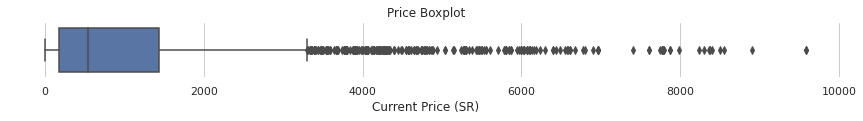

In [ ]:
sns.set(style="whitegrid", font_scale=1)
f, ax = plt.subplots(1, 1, figsize=(15,1))
sns.boxplot(x=df['price'])
sns.despine(bottom=True, left=True)
ax.set(xlabel='Current Price (SR)', title='Price Boxplot')

dari hasil uji distribusi di atas dengan boxplot, data harga menunjukkan sangat banyak outlier yang muncul dibandingkan kumpulan data umumnya. data tidak terdistribusi normal

**- Category -**

[Text(0, 0.5, 'Category'),
 Text(0.5, 0, 'Price'),
 Text(0.5, 1.0, 'Category vs Price Boxplot')]

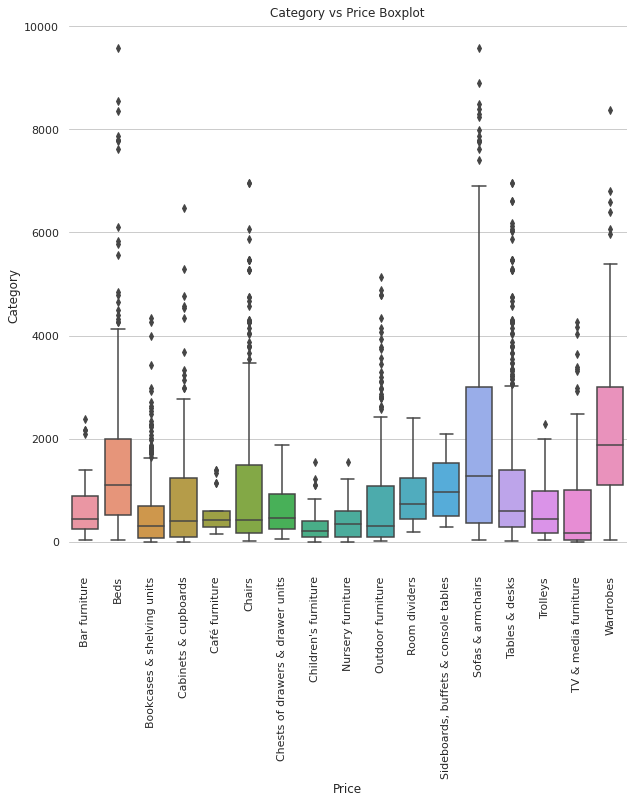

In [ ]:
sns.set(style="whitegrid", font_scale=1)
f, ax = plt.subplots(1, 1,figsize=(10,10))
sns.boxplot(x=df['category'],y=df['price'], ax=ax)
sns.despine(left=True, bottom=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set(xlabel='Price', ylabel='Category', title='Category vs Price Boxplot')

produk-produk di IKEA terbagi menjadi beberapa kategori. dari kategori tersebut, terlihat sofa & armchairs disusul dengan wardrobes dan beds memliki rentang harga yang lebar. semua kategori memiliki data outlier kecuali pada kategori chests of drawers & drawer units, room dividers, sideboards, buffets & console tablets.

**- Sellable Online and Other Colors -**

[Text(0, 0.5, 'Price'),
 Text(0.5, 0, 'Other Colors'),
 Text(0.5, 1.0, 'Other Colors vs Price Box Plot')]

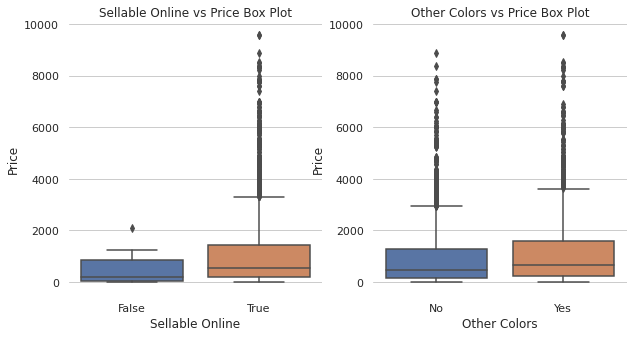

In [ ]:
sns.set(style="whitegrid", font_scale=1)
f, ax = plt.subplots(1, 2,figsize=(10,5))
sns.boxplot(x=df['sellable_online'],y=df['price'], ax=ax[0])
sns.boxplot(x=df['other_colors'],y=df['price'], ax=ax[1])
sns.despine(bottom=True, left=True)
ax[0].set(xlabel='Sellable Online', ylabel='Price', title='Sellable Online vs Price Box Plot')
ax[1].set(xlabel='Other Colors', ylabel='Price', title='Other Colors vs Price Box Plot')

produk yang dijual online memiliki rentang harga yang lebih lebar serta outlier dengan harga yang lebih tinggi dibandingkan dengan produk yang tidak dijual online. sedangkan terkait pilihan warnanya, produk yang memiliki pilihan warna memiliki rentang harga yang lebih lebar dan rata-rata harga yang lebih tinggi dibandingkan dengan harga produk yang tidak memiliki pilihan warna

**e. Data Distribution Plot**

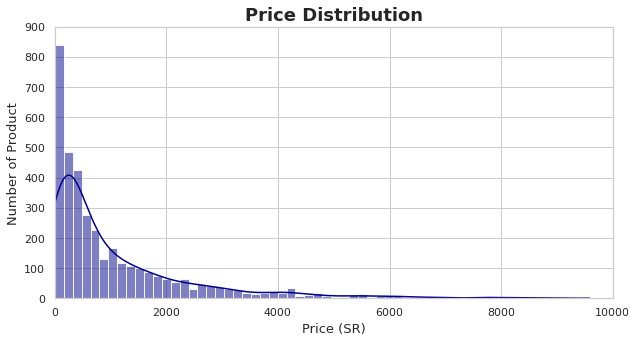

In [ ]:
plt.figure(figsize=[10, 5])
sns.histplot(df.price, kde=True, color='darkblue')

plt.title('Price Distribution', fontsize = 18, fontweight='bold')
plt.xlabel('Price (SR)', fontsize = 13)
plt.ylabel('Number of Product', fontsize = 13)
plt.xlim(0,10000)
plt.ylim(0,900)
plt.show()

dugaan data harga yang tidak terdistribusi normal pada pengecekan uji distribusi boxplot diperkuat dengan hasil uji histogram pada data harga. grafik histogram harga menunjukkan bel yang miring ke kiri dengan ekor ke sebelah kanan yang menunjukkan cukup banyak produk yang memiliki harga yang cukup tinggi jauh dibandingkan kumpulan data mayoritasnya.

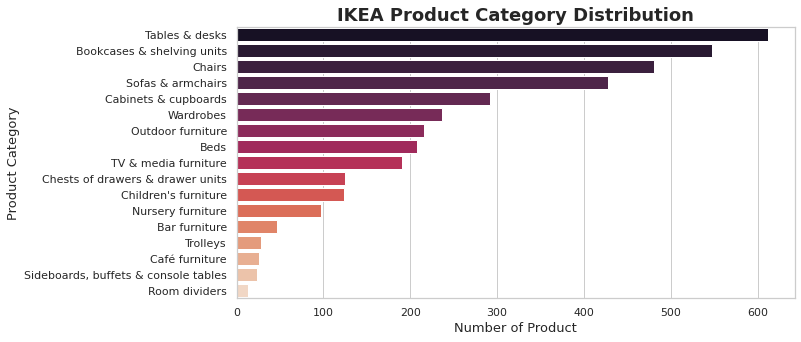

In [ ]:
plt.figure(figsize=[10, 5])
ax = sns.countplot(y=df.category, order=df.category.value_counts().index, palette='rocket')
plt.title('IKEA Product Category Distribution',fontsize=18, fontweight='bold')
plt.xlabel('Number of Product', fontsize=13)
plt.ylabel('Product Category', fontsize=13)
plt.show()

dari seluruh total data produk, jika dibagi dalam kategori, produk terdistribusi paling banyak ke dalam kategori tables & desks, bookcases & shelving units, dan chairs

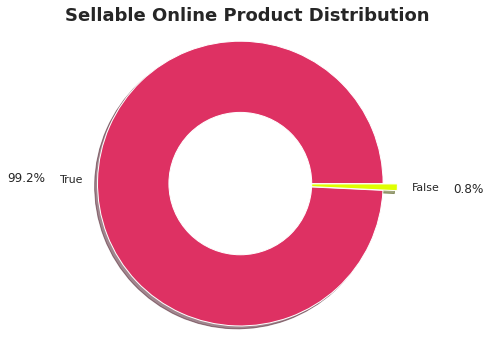

In [ ]:
# Pie chart
sellable_online_or_no = df['sellable_online'].value_counts()

colors = ['#DE3163', '#DFFF00']
# only "explode" 
explode = (0, 0.1)  

plt.figure(figsize=[7, 5])
plt.pie(sellable_online_or_no, explode=explode, labels=['True', 'False'], autopct='%1.1f%%', colors=colors, pctdistance=1.5, shadow=True)
plt.title('Sellable Online Product Distribution', fontsize = 18, fontweight='bold')

#draw circle
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')  
plt.tight_layout()
plt.show()

jika produk dilihat persentasenya antara yang dijual online dengan yang tidak, terlihat bahwa 99,2% produk IKEA dapat dijual dengan online sedangkan 0,8% sisanya hanya dapat dibeli di tokonya secara langsung.

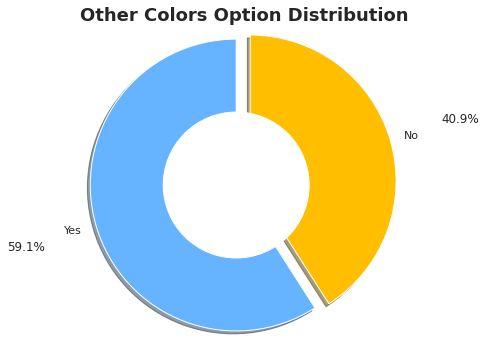

In [ ]:
# Pie chart
other_colors_or_no = df['other_colors'].value_counts()

colors = ['#66b3ff', '#FFBF00']
# only "explode" 
explode = (0, 0.1)  

plt.figure(figsize=[7, 5])
plt.pie(other_colors_or_no, explode=explode, labels=['Yes', 'No'], autopct='%1.1f%%', colors=colors, pctdistance=1.5, shadow=True, startangle=90)
plt.title('Other Colors Option Distribution', fontsize = 18, fontweight='bold')

#draw circle
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')  
plt.tight_layout()
plt.show()

mayoritas produk IKEA juga 59,1% nya memiliki pilihan warna dibandingkan dengan 40,9% produk sisanya yang hanya memiliki 1 warna.

[Text(0.5, 0, 'Width'), Text(0.5, 1.0, 'Width Plot')]

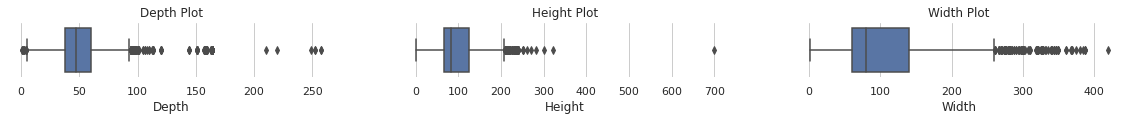

In [ ]:
sns.set(style="whitegrid", font_scale=1)
f, ax = plt.subplots(1, 3,figsize=(20,1))
sns.boxplot(x=df['depth'], ax=ax[0])
sns.boxplot(x=df['height'], ax=ax[1])
sns.boxplot(x=df['width'], ax=ax[2])
sns.despine(bottom=True, left=True)

ax[0].set(xlabel='Depth', title='Depth Plot')
ax[1].set(xlabel='Height', title='Height Plot')
ax[2].set(xlabel='Width', title='Width Plot')

distribusi dimensi pada setiap produk memiliki banyak outlier. rentang paling lebar terdapat pada dimensi width

**- Feature againts Price -**

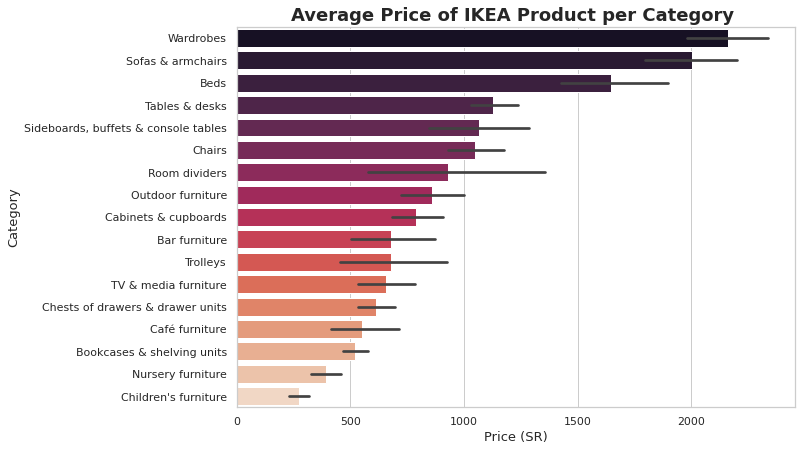

In [ ]:
plt.figure(figsize=[10, 7])
result = df.groupby(["category"])['price'].aggregate(np.mean).reset_index().sort_values('price', ascending=False)
sns.barplot(data=df, y='category', x='price', order=result['category'], palette='rocket')
plt.title('Average Price of IKEA Product per Category ', fontsize = 18, fontweight='bold')
plt.xlabel('Price (SR)', fontsize = 13)
plt.ylabel('Category', fontsize = 13)
plt.show()

rata-rata harga pada kategori tertinggi pada wardrobes, sofas & armchairs dan beds. namun rentang tertinggi antar harga produk per kategorinya ada pada room dividers, trolley, bers dan sideboards, buffets & console tables

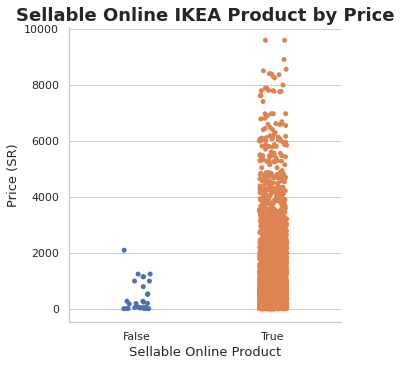

In [ ]:
sns.catplot(x="sellable_online", y="price", data=df)
plt.title('Sellable Online IKEA Product by Price', fontsize = 18, fontweight='bold')
plt.xlabel('Sellable Online Product', fontsize = 13)
plt.ylabel('Price (SR)', fontsize = 13)
plt.show()

produk-produk yang tidak dijual online memiliki harga yang lebih rendah dibandingkan dengan harga yang dijual secara online

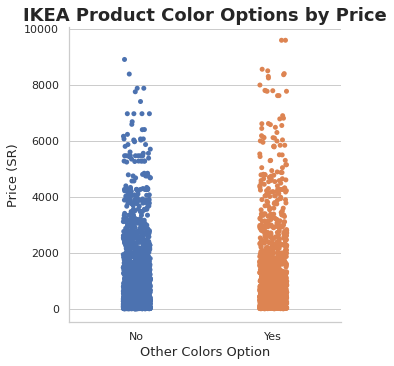

In [ ]:
sns.catplot(x="other_colors", y="price", data=df)
plt.title('IKEA Product Color Options by Price', fontsize = 18, fontweight='bold')
plt.xlabel('Other Colors Option', fontsize = 13)
plt.ylabel('Price (SR)', fontsize = 13)
plt.show()

namun pada sisi ketersediaan pilihan warna, produk yang dapat memilih warna dan hanya 1 warna terlihat seimbang

[Text(0, 0.5, 'Price'),
 Text(0.5, 0, 'Width (cm)'),
 Text(0.5, 1.0, 'Width vs Price Box Plot')]

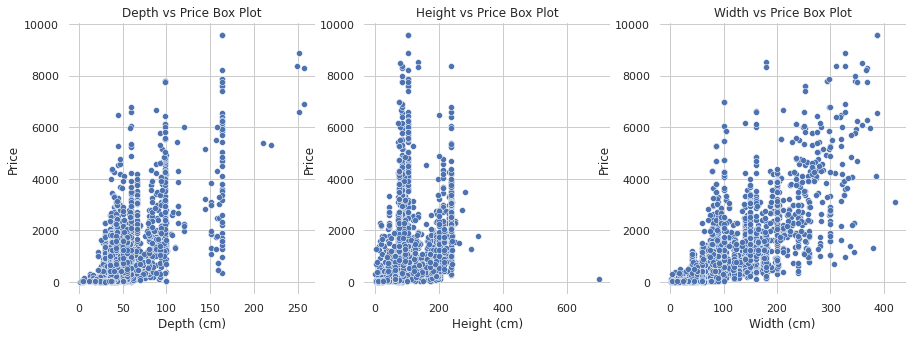

In [ ]:
sns.set(style="whitegrid", font_scale=1)
f, ax = plt.subplots(1, 3, figsize=(15,5))
sns.scatterplot(x=df['depth'],y=df['price'], ax=ax[0])
sns.scatterplot(x=df['height'],y=df['price'], ax=ax[1])
sns.scatterplot(x=df['width'],y=df['price'], ax=ax[2])
sns.despine(bottom=True, left=True)
ax[0].set(xlabel='Depth (cm)', ylabel='Price', title='Depth vs Price Box Plot')
ax[1].set(xlabel='Height (cm)', ylabel='Price', title='Height vs Price Box Plot')
ax[2].set(xlabel='Width (cm)', ylabel='Price', title='Width vs Price Box Plot')


di antara ketiga dimensi, dimensi width lebih menunjukkan pola yang positif terhadap harga dibandingkan depth dan height.

**- Feature againts Feature -**

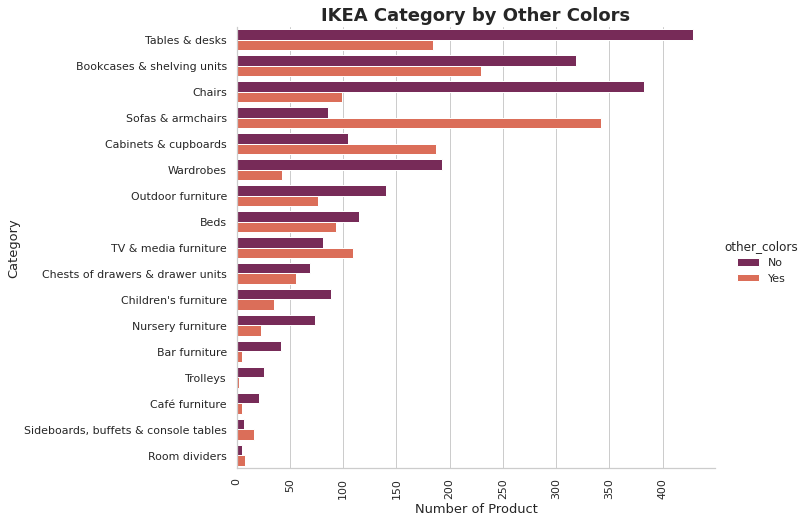

In [ ]:
order = df['category'].value_counts().index
sns.catplot(data=df, y="category", hue='other_colors', kind="count", order=order, palette='rocket', height=7, aspect=1.5)

plt.title('IKEA Category by Other Colors', fontsize = 18, fontweight='bold')
plt.xlabel('Number of Product', fontsize = 13)
plt.ylabel('Category', fontsize = 13)
plt.xticks(rotation=90)
plt.show()

kategori produk yang dapat memilih warna rata-rata lebih banyak produknya pada kategori sofas & armchairs, TV & media furnitures, dan sideboards, buffets & console table. sedangkan pada kategori sisanya rata-rata lebih banyak yang hanya 1 warna. 

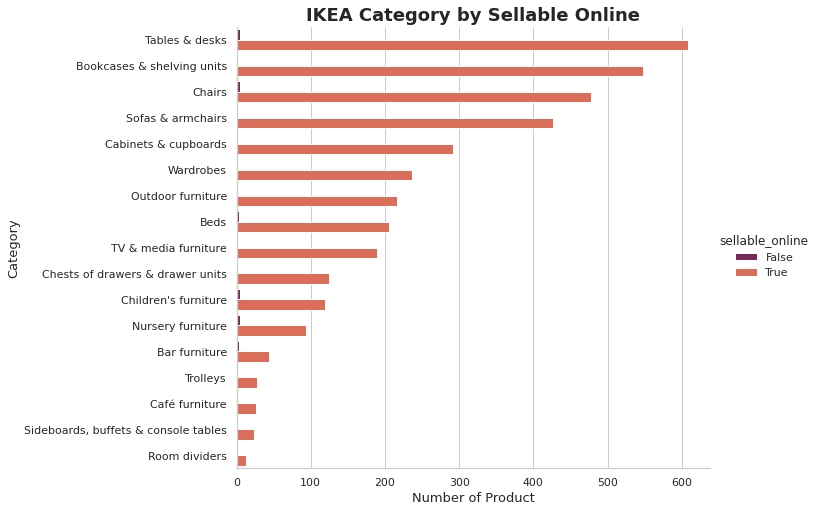

In [ ]:
order = df['category'].value_counts().index
sns.catplot(data=df, y="category", hue='sellable_online', kind="count", order=order, palette='rocket', height=7, aspect=1.5)

plt.title('IKEA Category by Sellable Online', fontsize = 18, fontweight='bold')
plt.xlabel('Number of Product', fontsize = 13)
plt.ylabel('Category', fontsize = 13)
plt.show()

jika dibandingkan antara kategori dengan ketersediaan penjualan online, hampir semua kategori mayoritas dijual secara online

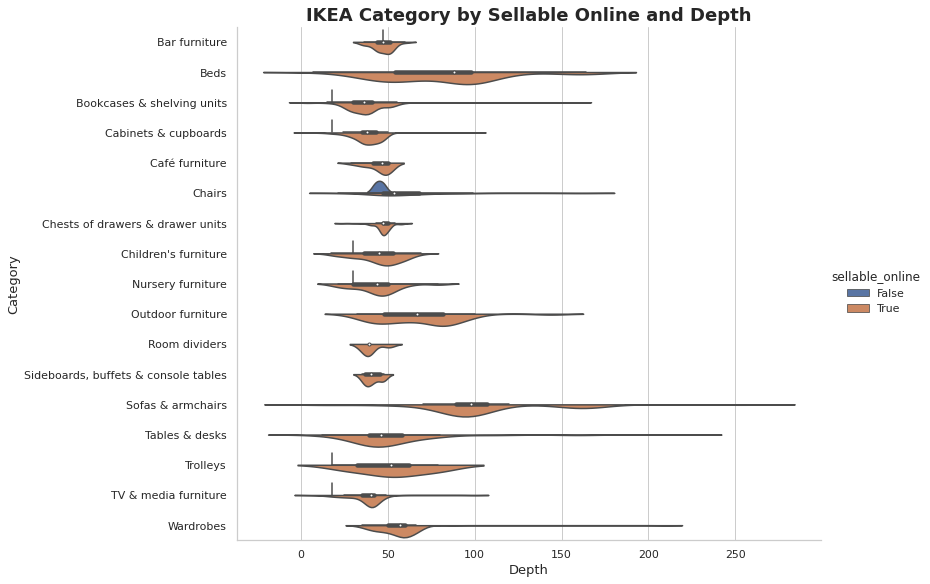

In [ ]:
sns.catplot(y="category", x='depth', hue="sellable_online",
            kind="violin", split=True, data=df, height=8, aspect=1.5)
plt.title('IKEA Category by Sellable Online and Depth', fontsize = 18, fontweight='bold')
plt.xlabel('Depth', fontsize = 13)
plt.ylabel('Category', fontsize = 13)
plt.show()

pada perbandingan antara depth dan kategori, sofas & armchairs, table & desks serta wardrobes memiliki depth yang palling dalam diantara kategori yang lain

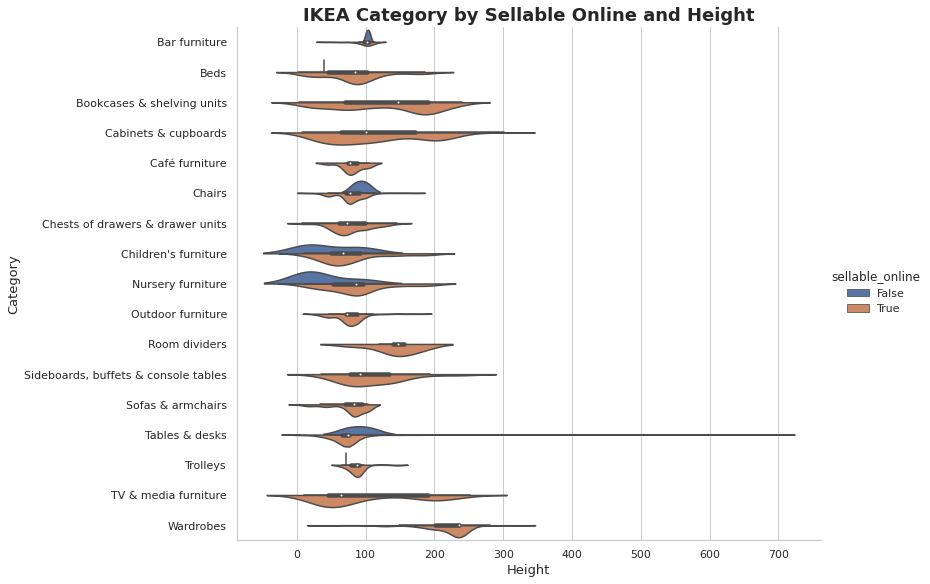

In [ ]:
sns.catplot(y="category", x='height', hue="sellable_online",
            kind="violin", split=True, data=df, height=8, aspect=1.5)
plt.title('IKEA Category by Sellable Online and Height', fontsize = 18, fontweight='bold')
plt.xlabel('Height', fontsize = 13)
plt.ylabel('Category', fontsize = 13)
plt.show()

pada perbandingan antara height dan kategori, table & desks, wardrobes, dan cabinets & cupboards memiliki height yang paling tinggi diantara kategori yang lain

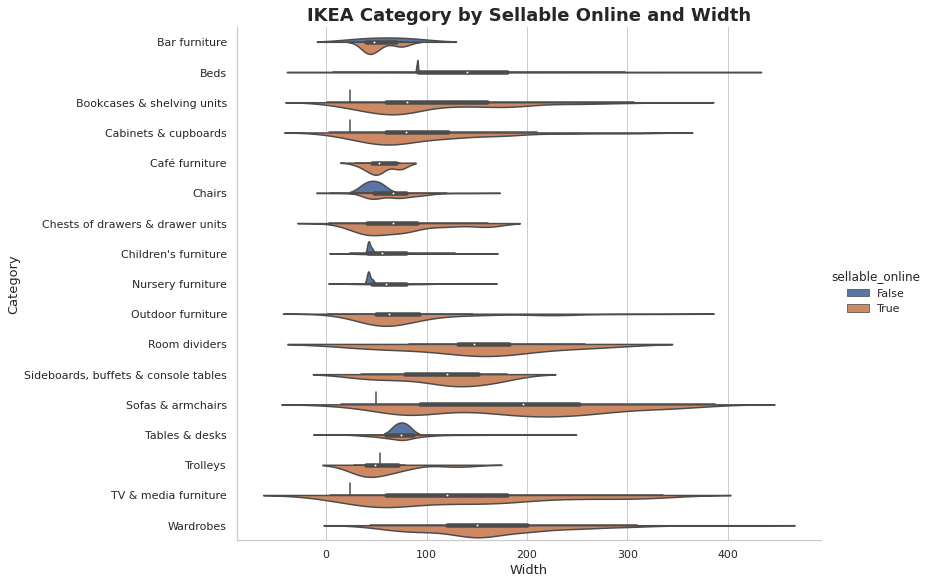

In [ ]:
sns.catplot(y="category", x='width', hue="sellable_online",
            kind="violin", split=True, data=df, height=8, aspect=1.5)
plt.title('IKEA Category by Sellable Online and Width', fontsize = 18, fontweight='bold')
plt.xlabel('Width', fontsize = 13)
plt.ylabel('Category', fontsize = 13)
plt.show()

pada perbandingan antara width dan kategori, wardrobes, sofas & armchairs, dan beds memiliki width yang paling lebar diantara kategori yang lain

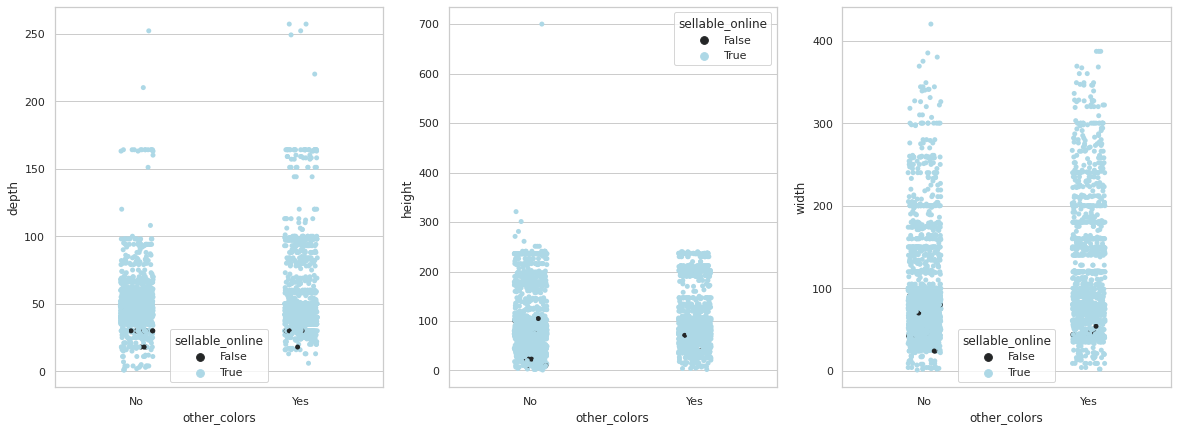

In [ ]:
fig, axs = plt.subplots (1, 3, figsize=(20, 7))
sns.stripplot(x="other_colors", y="depth", hue="sellable_online",  data=df, ax=axs[0], color='lightblue')
sns.stripplot(x="other_colors", y="height", hue="sellable_online", data=df, ax=axs[1], color='lightblue')
sns.stripplot(x="other_colors", y="width", hue="sellable_online", data=df, ax=axs[2], color='lightblue')


pada perbandingan ketiga dimensi tersebut dengan ketersediaan pilihan warna dan keterjualan online, semua produk pada dimensi dan ketersediaan pilihan warna terlihat seimbang. sedangkan pada penjualan online hanya terlihat sedikit saja pada titik hitam

<Figure size 720x576 with 0 Axes>

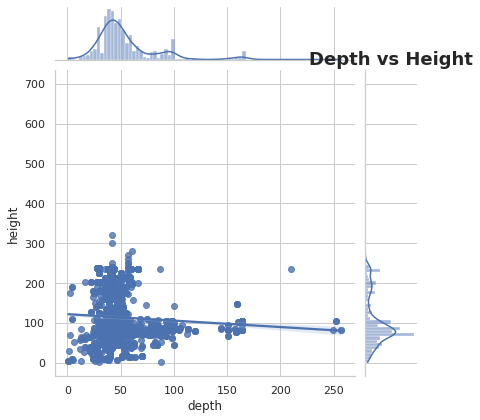

In [ ]:
plt.figure(figsize=[10, 8])
sns.jointplot("depth", "height", data=df, kind='reg')
plt.title('Depth vs Height', fontsize = 18, fontweight='bold')
plt.xlabel('Depth (cm)', fontsize = 13)
plt.ylabel('Height (cm)', fontsize = 13)
plt.show()

perbandingan antara dimensi depth dan height, menunjukkan pola linear yang hampir absolut dengan semakin tinggi depth, maka height semakin menurun

<Figure size 720x576 with 0 Axes>

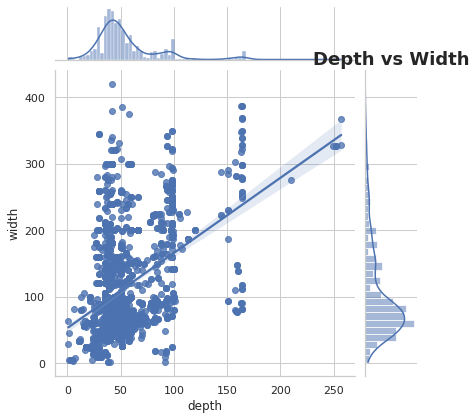

In [ ]:
plt.figure(figsize=[10, 8])
sns.jointplot("depth", "width", data=df, kind='reg')
plt.title('Depth vs Width', fontsize = 18, fontweight='bold')
plt.xlabel('Depth (cm)', fontsize = 13)
plt.ylabel('Width (cm)', fontsize = 13)
plt.show()

pada perbandingan depth dan width, pola menunjukkan linear yang positif terhadap depth dan width

<Figure size 720x576 with 0 Axes>

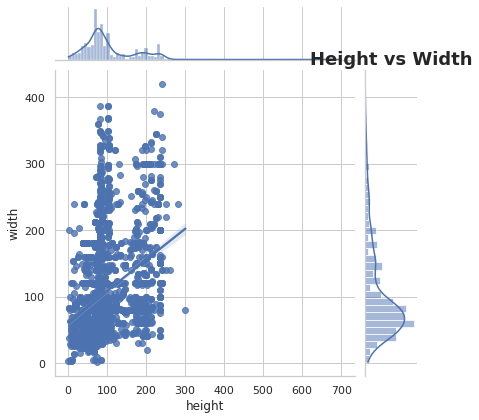

In [ ]:
plt.figure(figsize=[10, 8])
sns.jointplot("height", "width", data=df, kind='reg')
plt.title('Height vs Width', fontsize = 18, fontweight='bold')
plt.xlabel('Height (cm)', fontsize = 13)
plt.ylabel('Width (cm)', fontsize = 13)
plt.show()

pada perbandingan dimensi height dan width, pola menunjukkan kecenderungan pola linear yang lebih berat pada width

**f. Correlation**

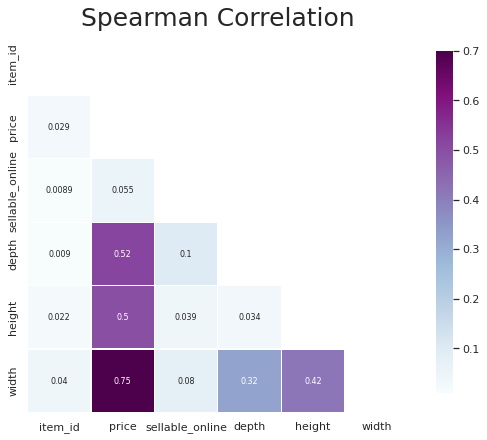

In [ ]:
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(10, 7))
plt.title('Spearman Correlation', fontsize=25)

sns.heatmap(df.corr(method='spearman'), linewidth=0.25, vmax=0.7, square=True, cmap='BuPu', 
           linecolor='w', annot=True, annot_kws={'size': 8}, mask=mask, cbar_kws={'shrink': .9})

hasil uji korelasi dengan spearman menunjukkan bahwa price memiliki korelasi yang lebih tinggi dengan width, height, dan depth. selain itu, width memiliki korelasi dengan depth dan height. hal ini menunjukkan ukuran dimensi memiliki hubungan yang lebih dengan harga produk

**g. Multicollinearity Check**

In [ ]:
x = df[['price','depth','height','width']].dropna() 
def calc_vif(x):
    vif = pd.DataFrame() 
    vif["variables"] = x.columns
    vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

    return(vif)

calc_vif(x)

,variables,VIF
0,price,4.341598
1,depth,3.999285
2,height,3.231385
3,width,7.447373


jika dibandingkan antara ke tiga dimensi dan harga, width memiliki multikolinearitas yang lebih tinggi dibandingkan 3 fitur yang lain.

**h. Linearity Check**

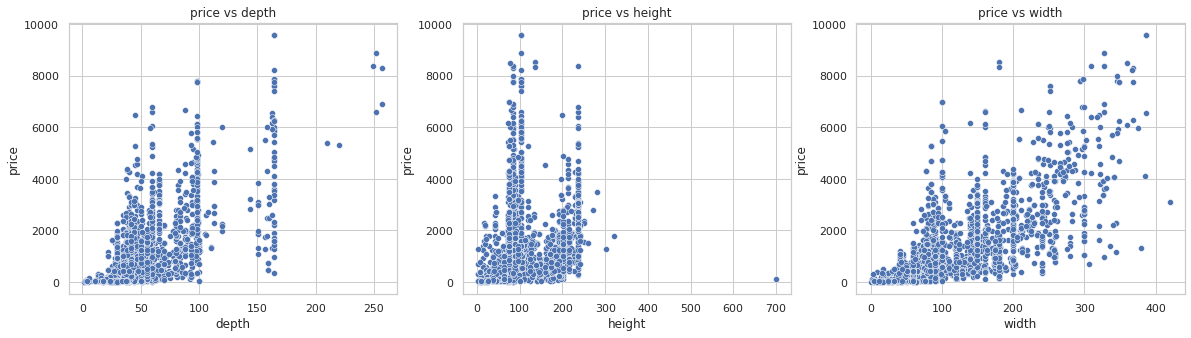

In [ ]:
plt.figure(figsize = (20, 5))
ax = plt.subplot(1,3,1)
sns.scatterplot(x="depth", y="price", data=df, ax= ax);
plt.title('price vs depth')

ax = plt.subplot(1,3,2)
sns.scatterplot(x="height", y="price", data=df, ax= ax);
plt.title('price vs height')

ax = plt.subplot(1,3,3)
sns.scatterplot(x="width", y="price", data=df, ax= ax);
plt.title('price vs width')
plt.show()

pada perbandingan ketiga dimensi dengan harga, dimensi width menunjukkan pola linear yang positif terhadap harga dibandingkan dengan depth dan height

**i. Conclusion**

berdasarkan temuan-temuan awal di atas, dapat disampaikan bahwa dimensi memiliki hubungan yang kuat terhadap harga dimana width menunjukkan pola yang positif terhadap harga. 
produk yang dijual online memiliki rata-rata harga yang lebih tinggi dibandingkan dengan produk yang tidak dijual online. sedangkan terkait pilihan warnanya, produk yang memiliki pilihan warna memiliki rata-rata harga yang sedikit lebih tinggi dibandingkan dengan harga produk yang tidak memiliki pilihan warna
rata-rata harga pada kategori tertinggi pada wardrobes, sofas & armchairs dan beds. namun rentang tertinggi antar harga produk per kategorinya ada pada room dividers, trolley, bers dan sideboards, buffets & console tables

sehingga dalam penentuan harga, perusahaan dapat memprhatikan pada dimensi produk (depth, height, dan width) serta ketersediaan penjualan online